## **Summer Olympics Data Analysis Assignment**

In [52]:
import pandas as pd
import numpy as np


In [53]:
df = pd.read_csv("summer.csv")

In [54]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [55]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


**Checking for null values**

In [56]:
df.isnull().any()

Year          False
City          False
Sport         False
Discipline    False
Athlete       False
Country        True
Gender        False
Event         False
Medal         False
dtype: bool

In [57]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [58]:
df[df['Country'].isnull()==True]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [59]:
df.drop([29603], axis = 0, inplace = True)
df.drop([31072], axis = 0, inplace = True)
df.drop([31091], axis = 0, inplace = True)
df.drop([31110], axis = 0, inplace = True)

In [60]:
df.isnull().any()

Year          False
City          False
Sport         False
Discipline    False
Athlete       False
Country       False
Gender        False
Event         False
Medal         False
dtype: bool

**1. In how many cities Summer Olympics is held so far?**

In [61]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [62]:
len(df['City'].unique())

22

**2. Which sport is having most number of gold medals so far? (Top 5)**

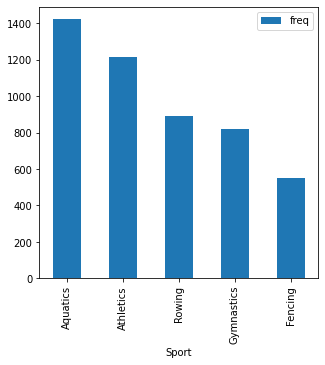

In [63]:
dfGold = df[df['Medal'] == 'Gold']
data=[]
for sport in dfGold['Sport'].unique():
  data.append([sport, len(dfGold[dfGold['Sport'] == sport])])

pd.DataFrame(data,columns = ['Sport','freq']).sort_values(by='freq', ascending=False).head().plot(x='Sport',y='freq',kind='bar',figsize = (5,5))   

**3. Which sport is having most number of medals so far? (Top 5)**

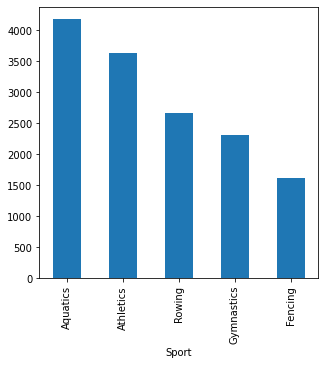

In [64]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(5,5))

**4. Which player has won most number of medals? (Top 5)**

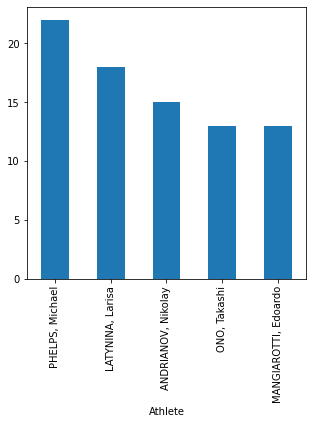

In [65]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(5,5))

**5. Which player has won most number Gold Medals of medals? (Top 5)**

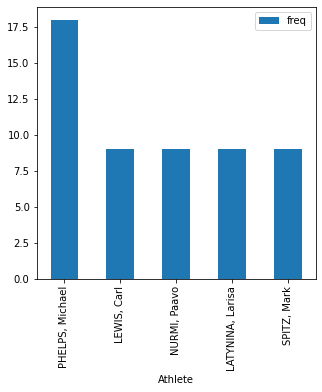

In [66]:
dfGold = df[df['Medal'] == 'Gold']
data = []
for athlete in dfGold['Athlete'].unique():
  data.append([athlete, len(dfGold[dfGold['Athlete'] == athlete])])
pd.DataFrame(data,columns = ['Athlete', 'freq']).sort_values(by='freq', ascending=False).head().plot(x='Athlete', y='freq', kind = 'bar', figsize = (5,5))

**6. In which year india won first Gold Medal in Summer Olympics?**

In [68]:
dfGold = df[df['Medal'] == 'Gold']
dfIndia = dfGold[dfGold['Country']=='IND']
year = dfIndia['Year'].values
year[0]

1928

**7. Which event is most popular in terms on number of players? (Top 5)**

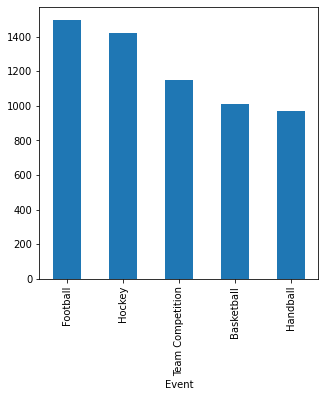

In [69]:
df.groupby('Event').count()['Athlete'].sort_values(ascending = False).head().plot.bar(figsize = (5,5))

**8. Which sport is having most female Gold Medalists? (Top 5)**

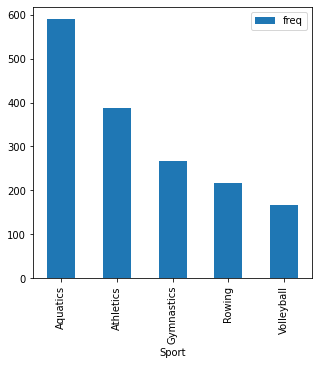

In [70]:
dfGold = df[df['Medal'] == 'Gold']
dfWomen = dfGold[dfGold['Gender'] == 'Women']
for sport in dfWomen['Sport'].unique():
  data.append([sport,len(dfWomen[dfWomen['Sport'] == sport])])
pd.DataFrame(data,columns=['Sport', 'freq']).sort_values(by = 'freq', ascending=False).head().plot(x = 'Sport', y = 'freq', kind = 'bar',figsize =(5,5))